# SEO Title Optimisation Project

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [4]:
#loading the dataset
product = pd.read_excel('productdata.xlsx')
print("Dataset loaded succesfully")

Dataset loaded succesfully


## Data Cleaning and Preparation

In [6]:
#understanding the data using shape function
product.shape

(3847, 6)

This means there are **3847** rows and **6** columns

In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRODUCTID      3847 non-null   int64  
 1   TITLE          3847 non-null   object 
 2   BULLET_POINTS  2256 non-null   object 
 3   DESCRIPTION    1703 non-null   object 
 4   PRODUCTTYPEID  3669 non-null   float64
 5   ProductLength  3669 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 180.5+ KB


Further analysis shows that dataset contains **3,847 products** with **6 features**, including product ID, title, and descriptions. While **PRODUCTID and TITLE are fully available**, **BULLET_POINTS (41%) and DESCRIPTION (56%) have significant missing values**, and **PRODUCTTYPEID and ProductLength (5%) have minor gaps**. These missing values will be addressed before further analysis.


In [8]:
product.head()

,PRODUCTID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCTTYPEID,ProductLength
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650.0,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112.0,598.424000


### Checking for duplicates

C:\Users\HP\AppData\Local\Temp\ipykernel_12812\1786143989.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(duplicate_counts.keys()), y=list(duplicate_counts.values()), palette=['blue', 'green'])


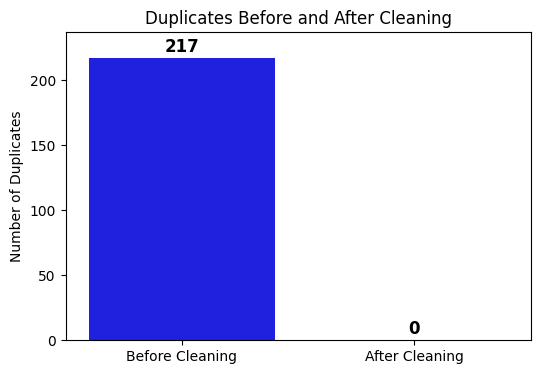

In [9]:
# Count duplicates before cleaning
duplicates_before = product.duplicated().sum()

# Remove duplicates in place to ensure product is actually cleaned
product.drop_duplicates(inplace=True)

# Count duplicates after cleaning
duplicates_after = product.duplicated().sum()  # Should be 0

# Data for visualization
duplicate_counts = {'Before Cleaning': duplicates_before, 'After Cleaning': duplicates_after}

# Plotting the bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=list(duplicate_counts.keys()), y=list(duplicate_counts.values()), palette=['blue', 'green'])

# **Adding labels to the bars**
for i, v in enumerate(duplicate_counts.values()):
    ax.text(i, v + 5, str(v), ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.ylabel("Number of Duplicates")
plt.title("Duplicates Before and After Cleaning")
plt.ylim(0, max(duplicate_counts.values()) + 20)  # Adjust y-axis for spacing

plt.show()


The dataset had **217** duplicate entries before cleaning, and **0** afterwards as shown in the visualisation above

### Checking for Blanks

In [10]:
missing_values = product.isnull().sum()
missing_percent = (product.isnull().sum() / len(product)) * 100

# Creating a DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2)  # Round to 2 decimal places
})

missing_df


,Missing Values,Percentage (%)
PRODUCTID,0,0.00
TITLE,0,0.00
BULLET_POINTS,1452,40.00
DESCRIPTION,1985,54.68
PRODUCTTYPEID,89,2.45
ProductLength,89,2.45


<Figure size 800x500 with 0 Axes>

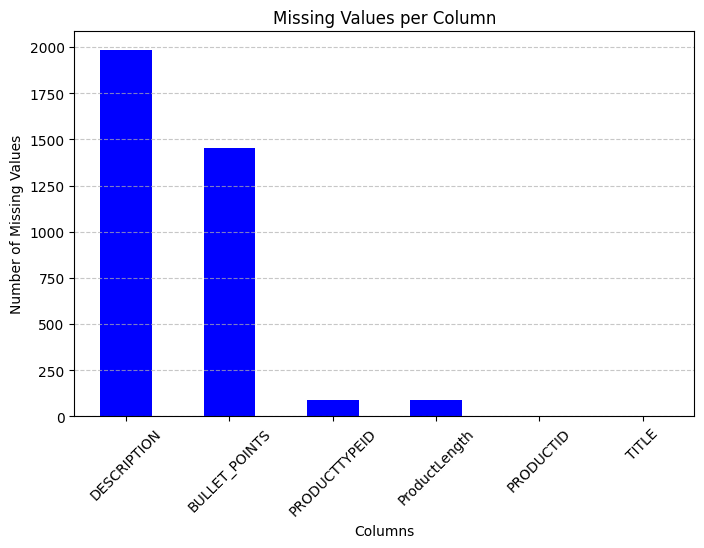

In [11]:


# Plot missing values
plt.figure(figsize=(8, 5))
missing_df.sort_values(by="Missing Values", ascending=False).plot(
    kind="bar", y="Missing Values", legend=False, color="blue", figsize=(8, 5)
)

# Labels and title
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### Handling Blanks

In [12]:
# Drop rows where numerical columns (float64) have missing values
product.dropna(subset=['PRODUCTTYPEID', 'ProductLength'], inplace=True)

# Replace missing values in categorical columns using .loc[]
product.loc[:, ['BULLET_POINTS', 'DESCRIPTION']] = product[['BULLET_POINTS', 'DESCRIPTION']].fillna("No information")

# Verify changes
print(product.isnull().sum())  # Should return 0 for these columns



PRODUCTID        0
TITLE            0
BULLET_POINTS    0
DESCRIPTION      0
PRODUCTTYPEID    0
ProductLength    0
dtype: int64


### Column Names

In [13]:
# Convert column names to snake_case
product.columns = product.columns.str.strip().str.lower().str.replace(" ", "_")

print(product.columns)  # Verify changes

Index(['productid', 'title', 'bullet_points', 'description', 'producttypeid',
       'productlength'],
      dtype='object')


## Analysing Title Column

Before we can begin creating our SEO titles, we need to understand the title column. So let's carry out some simple analysis on the column.
After our intial cleaning, we ended up with **3541** rows which equates to **3541** titles

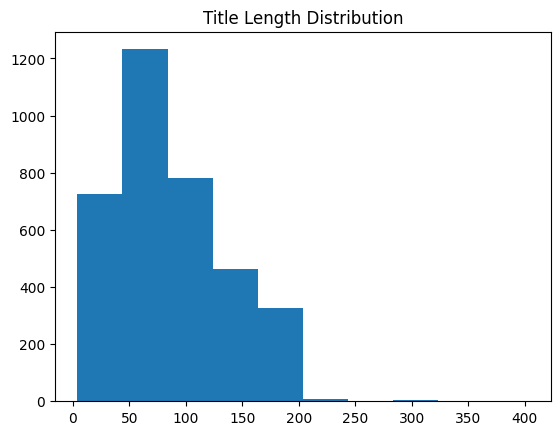

In [14]:
# What's the length range of our titles?
product['title'].str.len().describe()

# Maybe plot the distribution to visualize
plt.hist(product['title'].str.len())
plt.title('Title Length Distribution')
plt.show()

The histogram shows the distribution of product title lengths, with most titles falling between 50 and 150 characters. A few outliers extend beyond 250 characters, but they are rare. Since SEO titles are usually between 50-60 characters, our new short titles need to fall in that range

Most product titles contain numbers (2186) and special characters (2926), suggesting that they may include model numbers, prices, or unnecessary symbols that can be removed or shortened for SEO-friendly titles. Since only a few titles mention key features (2) or colors (22), we may need to prioritize adding relevant descriptors while trimming excess details to keep titles within 50-60 characters.

In [63]:
import re

def check_text_issues(df):
    """
    Identifies common text issues in title, bullet_points, and description columns.
    
    Returns:
    DataFrame: Summary of issues found in each column.
    """
    # Pre-compile regex patterns for performance
    patterns = {
        "Foreign Characters": re.compile(r"[^\x00-\x7F]"),  # Non-ASCII characters
        "HTML Tags": re.compile(r"<[^>]+>"),  # <br>, <p>, etc.
        "HTML Entities": re.compile(r"&\w+;"),  # &nbsp;, &gt;, etc.
        "Unspaced Words": re.compile(r"(?<=\w)(?=[A-Z])"),  # Words without spaces
        "Hex Encoding (_x0000_)": re.compile(r"_x[0-9A-Fa-f]{4}_"),  # Hex-like encoding
        "Special Characters": re.compile(r"[^a-zA-Z0-9\s]"),  # Symbols except spaces
        "Fully Uppercase Words": re.compile(r"\b[A-Z]{2,}\b"),  # Words in ALL CAPS
        "Sentence Capitalization": re.compile(r"^[a-z]"),  # Sentences not starting with a capital letter
        "Multiple Spaces": re.compile(r"\s{2,}"),  # Consecutive spaces
        "Leading/Trailing Spaces": re.compile(r"^\s+|\s+$")  # Spaces at the start or end
    }

    columns = ["title", "bullet_points", "description"]
    results = {col: {} for col in columns}

    for col in columns:
        if col in df.columns:
            for issue, pattern in patterns.items():
                results[col][issue] = df[col].str.contains(pattern, regex=True, na=False).sum()

    return pd.DataFrame(results)

# Run check on the product dataframe
text_issues_report = check_text_issues(product)

# Display results
print(text_issues_report)


                         title  bullet_points  description
Foreign Characters           0            403          264
HTML Tags                    0             30          463
HTML Entities                0             10          121
Unspaced Words            1001           1133          896
Hex Encoding (_x0000_)       0            112           42
Special Characters        2258           2132         1565
Fully Uppercase Words       50            983          739
Sentence Capitalization     79              2           20
Multiple Spaces              0              9           13
Leading/Trailing Spaces      0              0            1


The title column has a high count of special characters (2,258), unspaced words (1,001), and fully uppercase words (50), which may impact readability and SEO. To optimize, we’ll remove special characters, correct spacing, and convert uppercase words to title case while maintaining key terms for clarity.

Next, we'll focus on cleaning up special characters, ensuring proper spacing, and enforcing title case to meet SEO standards, keeping titles concise and relevant.

### Cleaning Title Column

In [16]:
print(product['title'].head())

0    ArtzFolio Tulip Flowers Blackout Curtain for D...
1    Marks & Spencer Girls' Pyjama Sets T86_2561C_N...
2    PRIKNIK Horn Red Electric Air Horn Compressor ...
3    ALISHAH Women's Cotton Ankle Length Leggings C...
4    The United Empire Loyalists: A Chronicle of th...
Name: title, dtype: object


In [17]:
# Function to clean the title column
def clean_title(title):
    if pd.isna(title):  # Handle missing values
        return ""
    
    # Remove special characters except necessary punctuation
    title = re.sub(r"[^a-zA-Z0-9,.'\-\s]", "", title)
    
    # Fix unspaced words (adding spaces after punctuation if missing)
    title = re.sub(r"(?<=[.,])(?!\s)", " ", title)
    
    # Convert fully uppercase words to title case
    title = " ".join([word.title() if word.isupper() else word for word in title.split()])
    
    # Remove foreign characters (non-ASCII)
    title = re.sub(r"[^\x00-\x7F]+", "", title)
    
    # Trim leading/trailing spaces
    return title.strip()

# Apply cleaning function to the title column
product['title'] = product['title'].apply(clean_title)


In [37]:
pd.set_option('display.max_colwidth', None)  # Show full text in columns

print(product['title'].head())

0                                                ArtzFolio Tulip Flowers Blackout Curtain for Door, Window Room Eyelets Tie Back Canvas Fabric Width 4. 5feet 54inch Height 5 feet 60 inch Set of 2 Pcs
1                                                                                                                                                Marks Spencer Girls' Pyjama Sets T862561CNavy Mix9-10Y
2                                                                                                     Priknik Horn Red Electric Air Horn Compressor Interior Dual Tone Trumpet Loud Compatible with Sx4
3                                                                                                                              Alishah Women's Cotton Ankle Length Leggings Combo of 2, Plus 12 ColorsL
4                                                                                                                                        The United Empire Loyalists A Chronicle of the Great Migration


In [55]:
import re

COLOR_LIST = [
    "black", "white", "red", "blue", "green", "yellow", "purple", "orange",
    "pink", "gray", "grey", "brown", "beige", "gold", "silver", "navy", "teal", "maroon"
]

FILLER_WORDS = {"for", "with", "plus"}

def is_color_token(token):
    token_letters = re.sub(r'[^A-Za-z]', '', token).lower()
    return token_letters in COLOR_LIST

def is_product_code(token):
    token_clean = re.sub(r'[^\w]', '', token)
    if len(token_clean) < 4:
        return False
    # Also treat tokens that are purely numeric (with length ≥ 4) as product codes.
    if token_clean.isdigit():
        return True
    return bool(re.search(r'\d', token_clean) and re.search(r'[A-Za-z]', token_clean))

def generate_short_title(title):
    """
    Generates an SEO-friendly short title by:
      • Attempting to extract a trailing measurement suffix (e.g. "-5" or "- 10Ml Each").
      • Removing that suffix from the title for further processing unless the word immediately
        before it is a filler (e.g. "plus").
      • Tokenizing the remaining title and filtering out tokens that are product codes or color adjectives.
      • Collecting tokens until a filler word is encountered.
      • If a measurement suffix was extracted, then limit the main part to 6 words.
      • If no filler word was encountered and the main part is very long (>8 words), limit it to 6 words.
      • Re-attach the measurement suffix (if any) using a hyphen separator.
      • Finally, truncate the result to 60 characters if necessary.
    """
    # 1. Attempt to extract a trailing measurement suffix.
    measurement_match = re.search(r'(-?\d+(?:\.\d+)?\s*[A-Za-z]+(?:\s+[A-Za-z]+)?)\s*$', title)
    if measurement_match:
        prefix = title[:measurement_match.start()].strip()
        # If the last word before the measurement is a filler word, cancel measurement extraction.
        if prefix and prefix.split()[-1].lower() in FILLER_WORDS:
            measurement_suffix = ""
            title_without_measurement = title.strip()
        else:
            measurement_suffix = re.sub(r'^-+', '', measurement_match.group(1).strip())
            title_without_measurement = title[:measurement_match.start()].strip()
    else:
        measurement_suffix = ""
        title_without_measurement = title.strip()
    
    # 2. Tokenize the remaining title.
    tokens_original = title_without_measurement.split()
    
    # 3. Filter out tokens that are product codes or color adjectives.
    tokens_filtered = [t for t in tokens_original if not (is_color_token(t) or is_product_code(t))]
    
    # 4. Build the main tokens by collecting tokens until a filler word is encountered.
    main_tokens = []
    used_filler = False
    for token in tokens_filtered:
        if token.lower() in FILLER_WORDS:
            used_filler = True
            break
        main_tokens.append(token)
    
    # 5. Decide if we should limit the main tokens:
    #    - If a measurement suffix was extracted, limit to 6 words.
    #    - Else, if no filler word was encountered and there are more than 8 words, limit to 6 words.
    if measurement_suffix:
        max_words = 6
        main_tokens = main_tokens[:max_words]
    elif not used_filler and len(main_tokens) > 8:
        max_words = 6
        main_tokens = main_tokens[:max_words]
    # Otherwise, keep all main_tokens (e.g. when a filler word was encountered).
    
    main_text = " ".join(main_tokens).strip()
    
    # 6. Reassemble the final title.
    if not main_text:
        final_title = title_without_measurement[:60].strip()
    else:
        final_title = f"{main_text} - {measurement_suffix}" if measurement_suffix else main_text
    
    final_title = re.sub(r'[\s,-]+$', '', final_title)
    if len(final_title) > 60:
        final_title = final_title[:60].rstrip()
    
    return final_title

# Add the generated short_title to the 'product' DataFrame in a new column.
product['short_title'] = product['title'].apply(generate_short_title)


In [59]:
product.head()

,productid,title,bullet_points,description,producttypeid,productlength,short_title
0,1925202,"ArtzFolio Tulip Flowers Blackout Curtain for Door, Window Room Eyelets Tie Back Canvas Fabric Width 4. 5feet 54inch Height 5 feet 60 inch Set of 2 Pcs","[LUXURIOUS & APPEALING: Beautiful custom-made curtains to decorate any home or office | Includes inbuilt tieback to hold the curtain | Completely finished and ready to hang on walls & windows,MATERIAL: Luxurious & versatile fabric with a natural finish | High colour fastness | State-of-the-art digital printing ensures colour consistency and prevents any fading | Eyelets; Cotton Canvas; Width 4.5feet (54inch) | Multicolour | PACKAGE: 2 Room Curtains Eyelets | SIZE: Height 5 feet (60 inch); SET OF 2 PCS,BLACKOUT CURTAIN: 100% opaque & heavy premium cotton canvas fabric | Tight knitted, long life & durable fabric | Printing only on front side with a plain colour back side,MADE TO PERFECTION: Large eyelets at the top to put hanging hooks | Perfectly tailored seams for durability | Refined stitching with a matching thread color,QUALITY ASSURED: Gentle wash with similar colors in cold water | Avoid direct sunlight to prevent fading | Dispatched after MULTIPLE QUALITY CHECKS]",No information,1650.0,2125.980000,ArtzFolio Tulip Flowers Blackout Curtain - 2 Pcs
1,2673191,Marks Spencer Girls' Pyjama Sets T862561CNavy Mix9-10Y,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% cotton (exclusive of trimmings),Ribbing - 98% cotton, 2% elastane]",No information,2755.0,393.700000,Marks Spencer Girls' Pyjama Sets - 10Y
2,2765088,Priknik Horn Red Electric Air Horn Compressor Interior Dual Tone Trumpet Loud Compatible with Sx4,"[Loud Dual Tone Trumpet Horn, Compatible With SX4,Electric Air Horn with Compressor, Compatible With SX4,High Quality, High Intensity Horn Sound, Compatible With SX4,Color: Red, Compatible With SX4,Professional installation required, Compatible With SX4]","Specifications: Color: Red, Material: Aluminium, Voltage: 12V, dB: 130 dB (around), Material: Aluminum Pump Head + Steel Pump Body + ABS Shell and Parts DB output: 130db Voltage: 12v Sound Type: Dual Tone Application: 12V Voltage Vehicles With Battery Above 20A Package included: 1 x Dual Tone Air Horn Compatible With SX4",7537.0,748.031495,Priknik Horn Electric Air Horn Compressor Interior Dual Tone
3,1594019,"Alishah Women's Cotton Ankle Length Leggings Combo of 2, Plus 12 ColorsL","[Made By 95%cotton and 5% Lycra which gives you 4 ways stretchable comfort, GSM 180 to 190,Come with Elasticized Waist Band, Slim Fit,Bubble free fabric and High quality steaching, Bio Wash,Skin-friendly fabric,ANKLE LENGTH LEGGINGS PACK OF 2]","AISHAH Women's Lycra Cotton Ankel Leggings. Brand: ALISHAH Length: Ankel Length Leggings. Size Chart Medium: 28 - 30 inch Large: 30 - 32 inch X-Large: 32 - 34 inch 2X-Large: 34 - 38 inch The color fade will not be there in washing. This cotton stretch leggings is designed to provide absolute comfort and body fit. Pair it with short or long kurta for modern look. High on style, fit and finish, this leggings is sure to lend you a sophisticated look. Please wash the dark colors separately in order to improve the product life. Disclaimer: Product color may slightly vary due to photographic lighting sources or your monitor settings. Please order according to your waist size mentioned in size chart",2996.0,787.401574,Alishah Women's Cotton Ankle Length Leggings Combo of 2
4,283658,The United Empire Loyalists A Chronicle of the Great Migration,No information,No information,6112.0,598.424000,The United Empire Loyalists A Chronicle


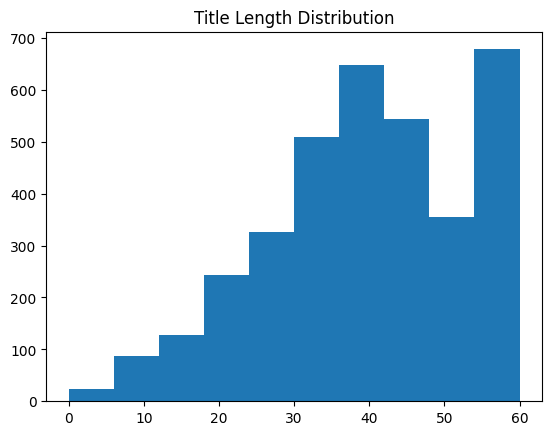

In [60]:
# Maybe plot the distribution to visualize
plt.hist(product['short_title'].str.len())
plt.title('Title Length Distribution')
plt.show()

In [58]:
product.to_excel("product_new.xlsx", index=False)
